# `Desafio de Regressão do 5º Andar`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999 # Configuração pra ver mais linhas e colunas dos Datasets
pd.options.display.max_columns = 999

In [2]:
db = pd.read_csv('base.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [4]:
db['PrecoVenda'] = db['PrecoVenda'].astype('float')

In [5]:
db.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
db.isnull()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [7]:
db.corr()

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
ClasseImovel,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
Fachada,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
TamanhoLote,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
Qualidade,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
Condicao,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
AnoConstrucao,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
AnoReforma,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
AreaAlvenaria,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
AreaAcabPorao1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.2600

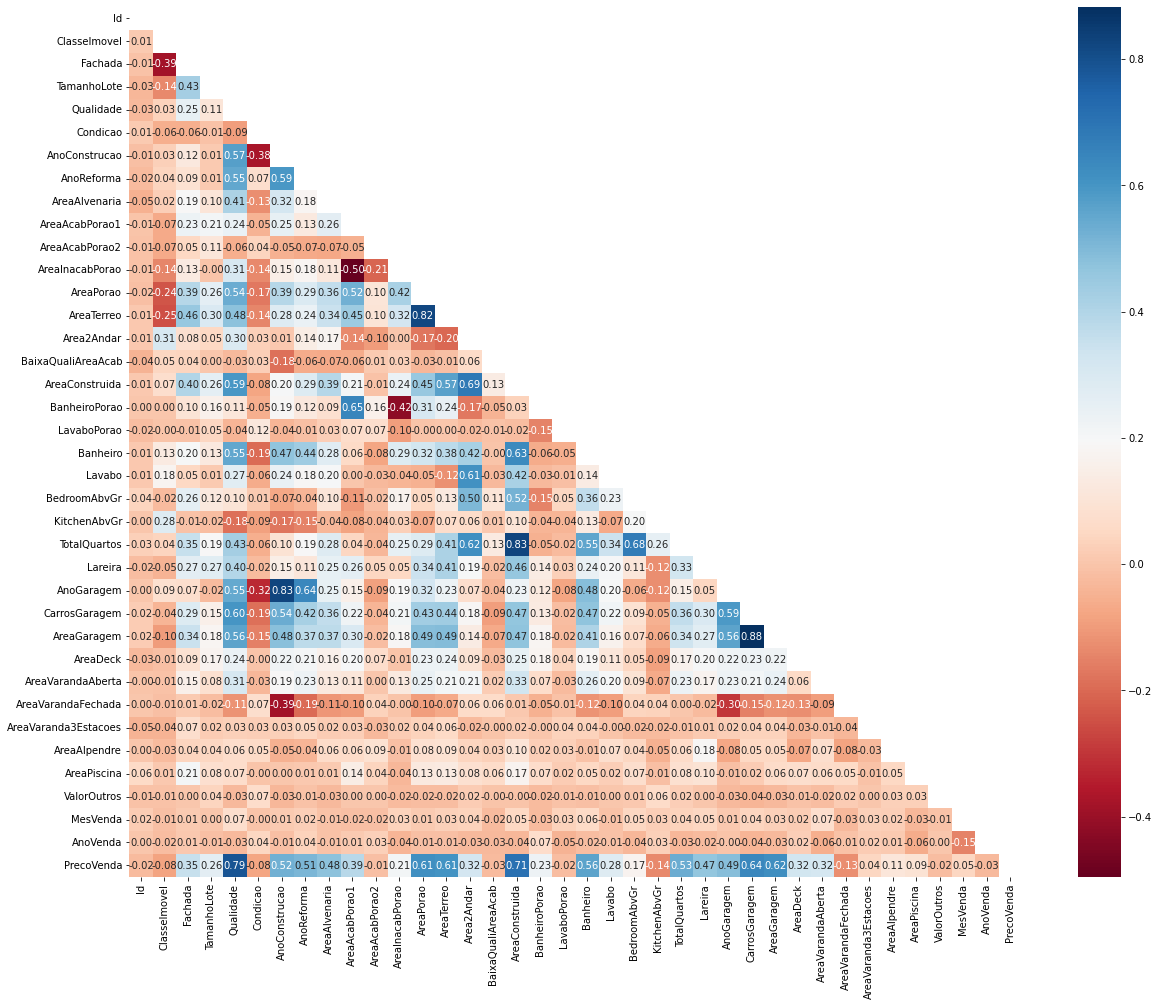

In [8]:
import numpy as np

# Plotando a matriz de correlações usando um Heatmap 

sns.set_context(font_scale=1.9)
plt.figure(figsize=(20,16))
sns.heatmap(
    db.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu', 
    mask=np.triu(np.ones_like(db.corr())) 
           )
plt.show()

### `Variáveis que possuem correlação mais forte com a Target (PreçoVenda):` 

Qualidade, AreaContruida

**kitchen ABGR e Área da Varanda Fechada, tem uma relação forte negativa**

In [9]:
db.drop(db.columns[[6, 72, 73, 74]], axis=1, inplace=True)

In [10]:
db.fillna(0, inplace=True)

In [11]:
# Percentual de casos faltantes (NaN)

db.isnull().mean().round(4)*100

Id                      0.0
ClasseImovel            0.0
ClasseZona              0.0
Fachada                 0.0
TamanhoLote             0.0
Rua                     0.0
FormaProp               0.0
PlanoProp               0.0
Servicos                0.0
ConfigLote              0.0
InclinacaoLote          0.0
Bairro                  0.0
Estrada1                0.0
Estrada2                0.0
TipoHabitacao           0.0
EstiloHabitacao         0.0
Qualidade               0.0
Condicao                0.0
AnoConstrucao           0.0
AnoReforma              0.0
TipoTelhado             0.0
MaterialTelhado         0.0
Exterior1               0.0
Exterior2               0.0
TipoAlvenaria           0.0
AreaAlvenaria           0.0
QualidadeCobertura      0.0
CondicaoExterna         0.0
TipoFundacao            0.0
AlturaPorao             0.0
CondicaoPorao           0.0
ParedePorao             0.0
TipoAcabPorao1          0.0
AreaAcabPorao1          0.0
TipoAcabPorao2          0.0
AreaAcabPorao2      

In [12]:
db.head(1)

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0


In [13]:
db.describe()

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


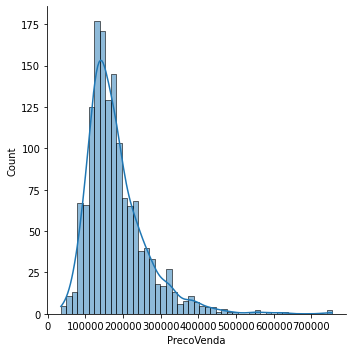

In [14]:
sns.displot(db, x="PrecoVenda", kde=True)

Será necessário uma transformação logaritmica pois a Distribuição está Assimétrica Positiva

In [15]:
# Qualidade Material geral e qualidade de acabamento

label_quali = {
  "Qualidade": {1: 'Muito ruim', 2: 'Ruim', 3: 'Justo', 4: 'Abaixo da média', 5: 'Média', 6: 'Acima da média', 7: 'Bom', 8: 'Muito bom', 9: 'Excelente', 10: 'Muito excelente'},
  "Banheiro": {1: '1 Banheiro', 2: '2 Banheiros', 3: '3 Banheiros', 4: '4 Banheiros', 5: '5 Banheiros'},
  "TotalQuartos": {1: '1 Quarto', 2: '2 Quartos', 3: '3 Quartos', 4: '4 Quartos', 5: '5 Quartos', 6: '6 Quartos', 7: '7 Quartos', 8: '8 Quartos', 9: '9 Quartos', 10: '10 Quartos', 11: '11 Quartos', 12: '12 Quartos', 13: '13 Quartos', 14: '14 Quartos'},
  "KitchenAbvGr": {1: '1 Cozinha', 2: '2 Cozinhas', 3: '3 Cozinhas', 4: '4 Cozinhas', 5: '5 Cozinhas', 6: '6 Cozinhas', 7: '7 Cozinhas', 8: '8 Cozinhas', 9: '9 Cozinhas', 10: '10 Cozinhas'}
}

In [16]:
# CATEGORIAS:

# 10 Muito excelente
# 9 Excelente
# 8 Muito bom
# 7 Bom
# 6 Acima da média
# 5 Média
# 4 Abaixo da média
# 3 Justo
# 2 Ruim
# 1 Muito ruim

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="PrecoVenda", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

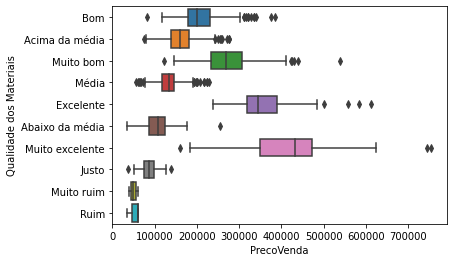

In [17]:
grafico_boxplot_grp(db.replace(label_quali), "Qualidade", "Qualidade dos Materiais")

In [18]:
from scipy.stats import f_oneway

db_aux = db[["Qualidade", "PrecoVenda"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.Qualidade == 1)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 2)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 3)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 4)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 5)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 6)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 7)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 8)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 9)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 10)]["PrecoVenda"],)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=349.027, p=0.000


In [19]:
# Teste Tukey para verificar aonde há diferença entre Qualidade X PrecoVenda

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PrecoVenda'],
                  db_aux['Qualidade'],
                  alpha = 0.05)

print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      2   1620.3333    0.9 -127919.147 131159.8137  False
     1      3    37323.75    0.9 -67914.6213 142562.1213  False
     1      4  58270.6552 0.6928 -42931.5055 159472.8159  False
     1      5  83373.3476 0.2062 -17219.9326 183966.6279  False
     1      6 111453.0348 0.0166  10844.2514 212061.8181   True
     1      7 157566.4232  0.001  56911.5165 258221.3299   True
     1      8 224585.5357  0.001 123649.1858 325521.8856   True
     1      9 317363.0233  0.001 214715.1856 420010.8609   True
     1     10 388438.3889  0.001 282669.8461 494206.9317   True
     2      3  35703.4167    0.9 -52154.5335 123561.3668  False
     2      4  56650.3218 0.4843 -26330.2899 139630.9336  False
     2      5  81753.0143 0.0529   -483.9156 163989.9441  False
     2      6 109832.7014  0.001  27576.

Utilizei a Variável: 'Qualidade' para aplicar o teste T-Studant e Tukey, verificando que, de fato, há uma relação forte entres estas variáveis.

<AxesSubplot:xlabel='AnoReforma', ylabel='PrecoVenda'>

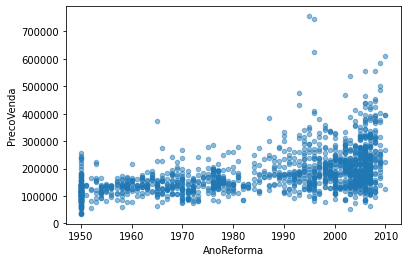

In [20]:
db.plot('AnoReforma', 'PrecoVenda', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='AnoConstrucao', ylabel='PrecoVenda'>

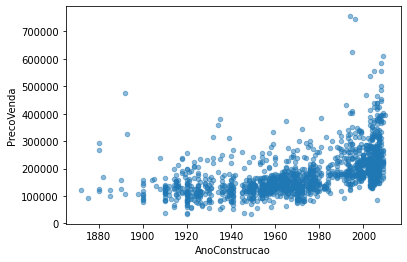

In [21]:
db.plot('AnoConstrucao', 'PrecoVenda', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='AreaPorao', ylabel='PrecoVenda'>

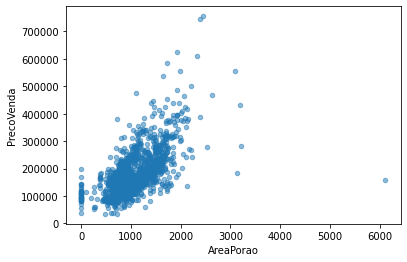

In [22]:
db.plot('AreaPorao', 'PrecoVenda', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='AreaTerreo', ylabel='PrecoVenda'>

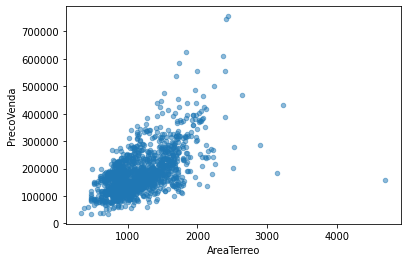

In [23]:
db.plot('AreaTerreo', 'PrecoVenda', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='AreaConstruida', ylabel='PrecoVenda'>

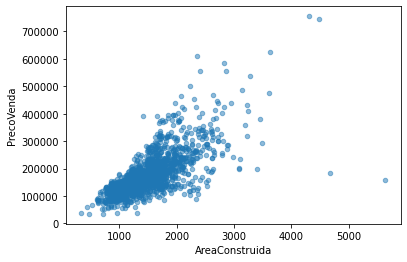

In [24]:
db.plot('AreaConstruida', 'PrecoVenda', kind='scatter', alpha=0.5)

In [25]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

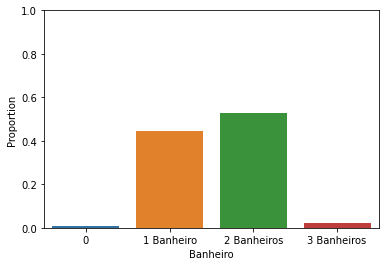

In [26]:
grafico_barras_prop(db.replace(label_quali), variable = "Banheiro")

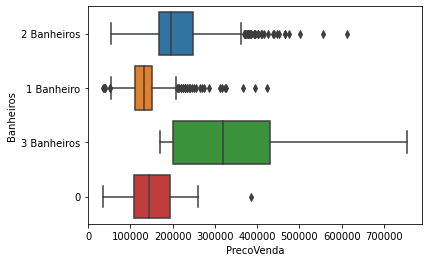

In [27]:
grafico_boxplot_grp(db.replace(label_quali), "Banheiro", "Banheiros")

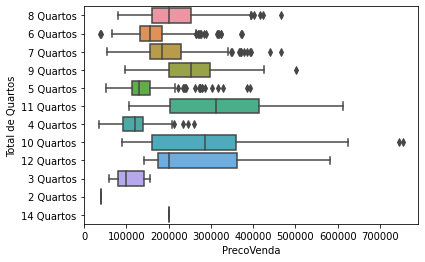

In [28]:
grafico_boxplot_grp(db.replace(label_quali), "TotalQuartos", "Total de Quartos")

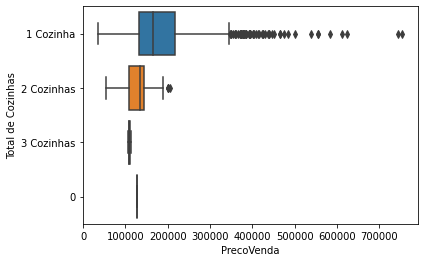

In [29]:
grafico_boxplot_grp(db.replace(label_quali), "KitchenAbvGr", "Total de Cozinhas")

<AxesSubplot:xlabel='AreaGaragem', ylabel='PrecoVenda'>

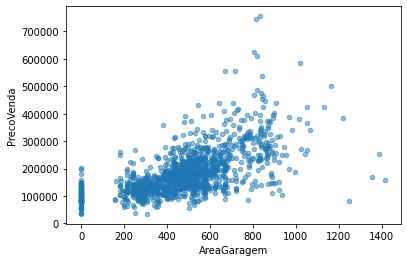

In [30]:
db.plot('AreaGaragem', 'PrecoVenda', kind='scatter', alpha=0.5)

**`Conclusão:`**

Há uma enorme tendência de casas grandes com mais cômodos serem mais valorizadas. Também é possível observar que Casas construidas com materias de melhor qualidade valem mais e, por último, construções mais recentes ou, recém reformadas possuem maior valor de mercado.

`Qualidade, Ano Construção, Ano reforma, AreaPorao, Area Terreo, Area Construída, Banheiro, Total Quartos, AreaGaragem, Lareira, AreaDeck, AreaVarandaAberta, AreaAvenaria`

In [50]:
db['AreaConstruidaExterna'] = db['AreaGaragem'] + db['AreaDeck'] + db['AreaVarandaAberta'] + db['AreaVarandaFechada'] + db['Fachada'] + db['AreaPiscina'] + db['AreaVaranda3Estacoes']

db['AreaConstruidaExterna']

0        674.0
1        838.0
2        718.0
3       1009.0
4       1196.0
         ...  
1455     562.0
1456     934.0
1457     378.0
1458     786.0
1459    1155.0
Name: AreaConstruidaExterna, Length: 1460, dtype: float64

In [51]:
db['AreaConstruidaInterna'] = db['AreaPorao'] + db['AreaAcabPorao1'] + db['AreaTerreo'] + db['Area2Andar'] + db['AreaAlpendre'] + db['AreaAlvenaria']

db['AreaConstruidaInterna']

0       3468.0
1       3502.0
2       3354.0
3       2689.0
4       4348.0
         ...  
1455    2600.0
1456    4524.0
1457    3767.0
1458    2205.0
1459    3342.0
Name: AreaConstruidaInterna, Length: 1460, dtype: float64

In [52]:
db['NºComodos'] = db['TotalQuartos'] + db['Banheiro'] + db['Lavabo'] + db['BanheiroPorao'] + db['LavaboPorao'] + db['KitchenAbvGr'] + db['Lareira'] + db['BedroomAbvGr']

In [53]:
db1 = db[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao', 'PrecoVenda']]

db1.head()

,Qualidade,NºComodos,AnoReforma,AreaConstruidaExterna,AreaConstruidaInterna,AnoConstrucao,PrecoVenda
0,7,16,2003,674.0,3468.0,2003,208500.0
1,6,14,1976,838.0,3502.0,1976,181500.0
2,7,15,2002,718.0,3354.0,2001,223500.0
3,7,14,1970,1009.0,2689.0,1915,140000.0
4,8,19,2000,1196.0,4348.0,2000,250000.0


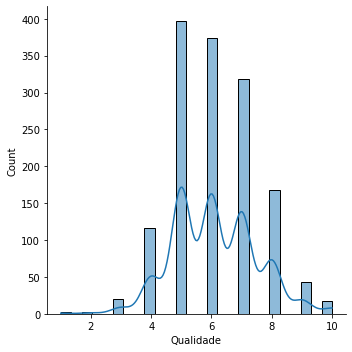

In [35]:
sns.displot(db1, x="Qualidade", kde=True)

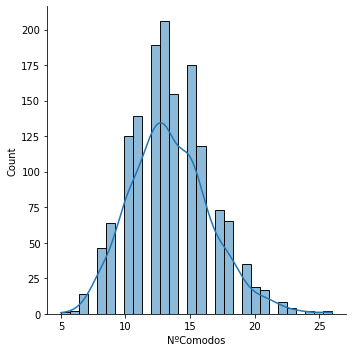

In [36]:
sns.displot(db1, x="NºComodos", kde=True)

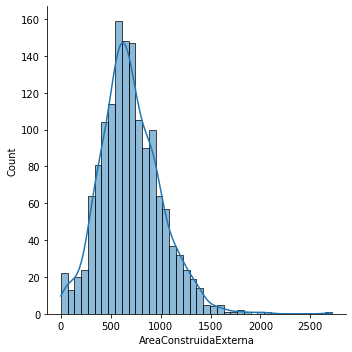

In [37]:
sns.displot(db1, x="AreaConstruidaExterna", kde=True)

C:\Users\Computer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Computer\AppData\Local\Temp/ipykernel_10992/2103768592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AreaConstruidaExterna"] = np.log(db1["AreaConstruidaExterna"])


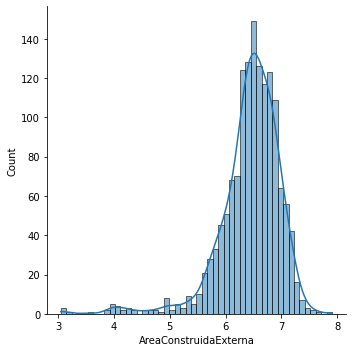

In [38]:
db1["AreaConstruidaExterna"] = np.log(db1["AreaConstruidaExterna"])

sns.displot(db1, x="AreaConstruidaExterna", kde=True)
plt.show()

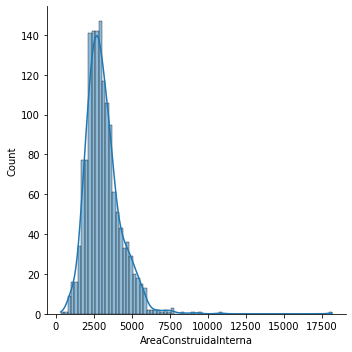

In [39]:
sns.displot(db1, x="AreaConstruidaInterna", kde=True)

C:\Users\Computer\AppData\Local\Temp/ipykernel_10992/2840067063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AreaConstruidaInterna"] = np.log(db1["AreaConstruidaInterna"])


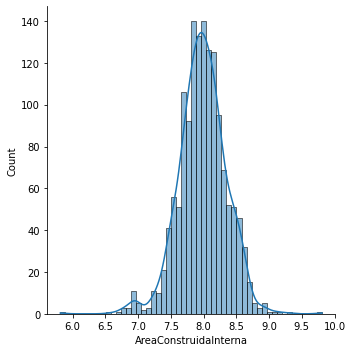

In [40]:
db1["AreaConstruidaInterna"] = np.log(db1["AreaConstruidaInterna"])

sns.displot(db1, x="AreaConstruidaInterna", kde=True)
plt.show()

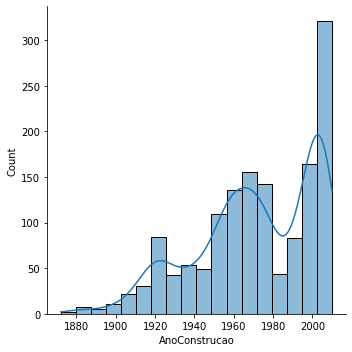

In [41]:
sns.displot(db1, x="AnoConstrucao", kde=True)

C:\Users\Computer\AppData\Local\Temp/ipykernel_10992/2952008492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AnoConstrucao"] = np.log(db1["AnoConstrucao"])


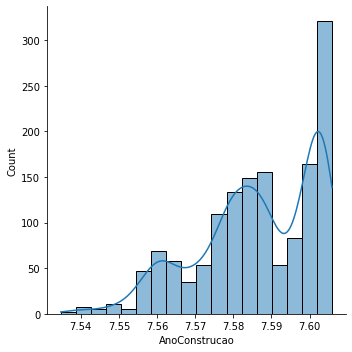

In [42]:
db1["AnoConstrucao"] = np.log(db1["AnoConstrucao"])

sns.displot(db1, x="AnoConstrucao", kde=True)
plt.show()

C:\Users\Computer\AppData\Local\Temp/ipykernel_10992/471955318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AnoReforma"] = np.log(db1["AnoReforma"])


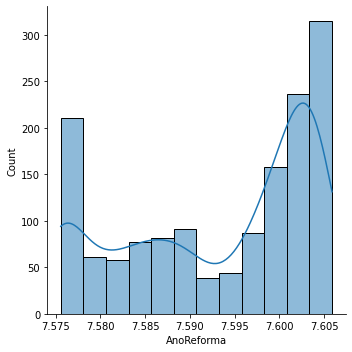

In [43]:
db1["AnoReforma"] = np.log(db1["AnoReforma"])

sns.displot(db1, x="AnoReforma", kde=True)
plt.show()

C:\Users\Computer\AppData\Local\Temp/ipykernel_10992/2165610848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["PrecoVenda"] = np.log(db1["PrecoVenda"])


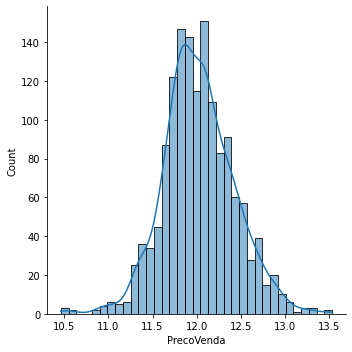

In [44]:
db1["PrecoVenda"] = np.log(db1["PrecoVenda"])

sns.displot(db1, x="PrecoVenda", kde=True)
plt.show()

In [54]:
Var_Ind_ = db1[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']]

target = db1[['PrecoVenda']]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Var_Ind_, target,  test_size=0.2, random_state=42)

In [56]:
import statsmodels.formula.api as sm

reg_linear1 = sm.ols(formula='PrecoVenda~Qualidade', data=db1.iloc[X_train.index,:]).fit()
reg_linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PrecoVenda   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          2.60e-245
Time:                        17:58:59   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.023e+04   6421.492    -14.052      0.000   -1.03e+05   -7.76e+04
Qualidade   4.438e+04   1023.777     43.349      0.000    4.24e+04    4.64e+04
==============================================================================
Omnibus:                      396.196   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.603
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                      10.368   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

def imprimir_metricas(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred)**0.5
    r2_train = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred)**0.5
    r2_test = r2_score(y_test, test_pred)

    print(f'''***{name}***
    treino
    RMSE: {round(rmse_train, 2)}
    R2: {round(r2_train, 2)}\n
    teste:
    RMSR: {round(rmse_test, 2)}
    R2: {round(r2_test, 2)}''')

In [58]:
from sklearn.linear_model import LinearRegression

rls = LinearRegression()
rls.fit(X_train[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_train)
rls.fit(X_test[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_test)

imprimir_metricas(rls, X_train[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], X_test[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_train, y_test, 'Regressão Linear Múltipla')

***Regressão Linear Múltipla***
    treino
    RMSE: 40022.89
    R2: 0.73

    teste:
    RMSR: 36089.93
    R2: 0.83


Podemos observar pelo teste Durbin-Watson que, há uma baixa autocorrelação positiva entre as variaveis explicativas. 

O R² aumenta, na medida que são acrescentadas Variaveis Explicativas e está em um valor satisfatória do quanto as Variaveis Explicativas respondem.

O RMSE tbm está satisfatório, pois reduziu a variação de Resíduos.